## WEEK 2 ASSIGNMENT

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [62]:
# Read the data 
df = pd.read_csv("data/crop_data.csv")
# Display the first 5 rows
df.head() 

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [63]:
df.shape

(2200, 8)

In [64]:
# info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [65]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [66]:
df.duplicated().sum()

0

In [67]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [68]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [69]:
features = df.columns.to_list()
features.remove('label')
features

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

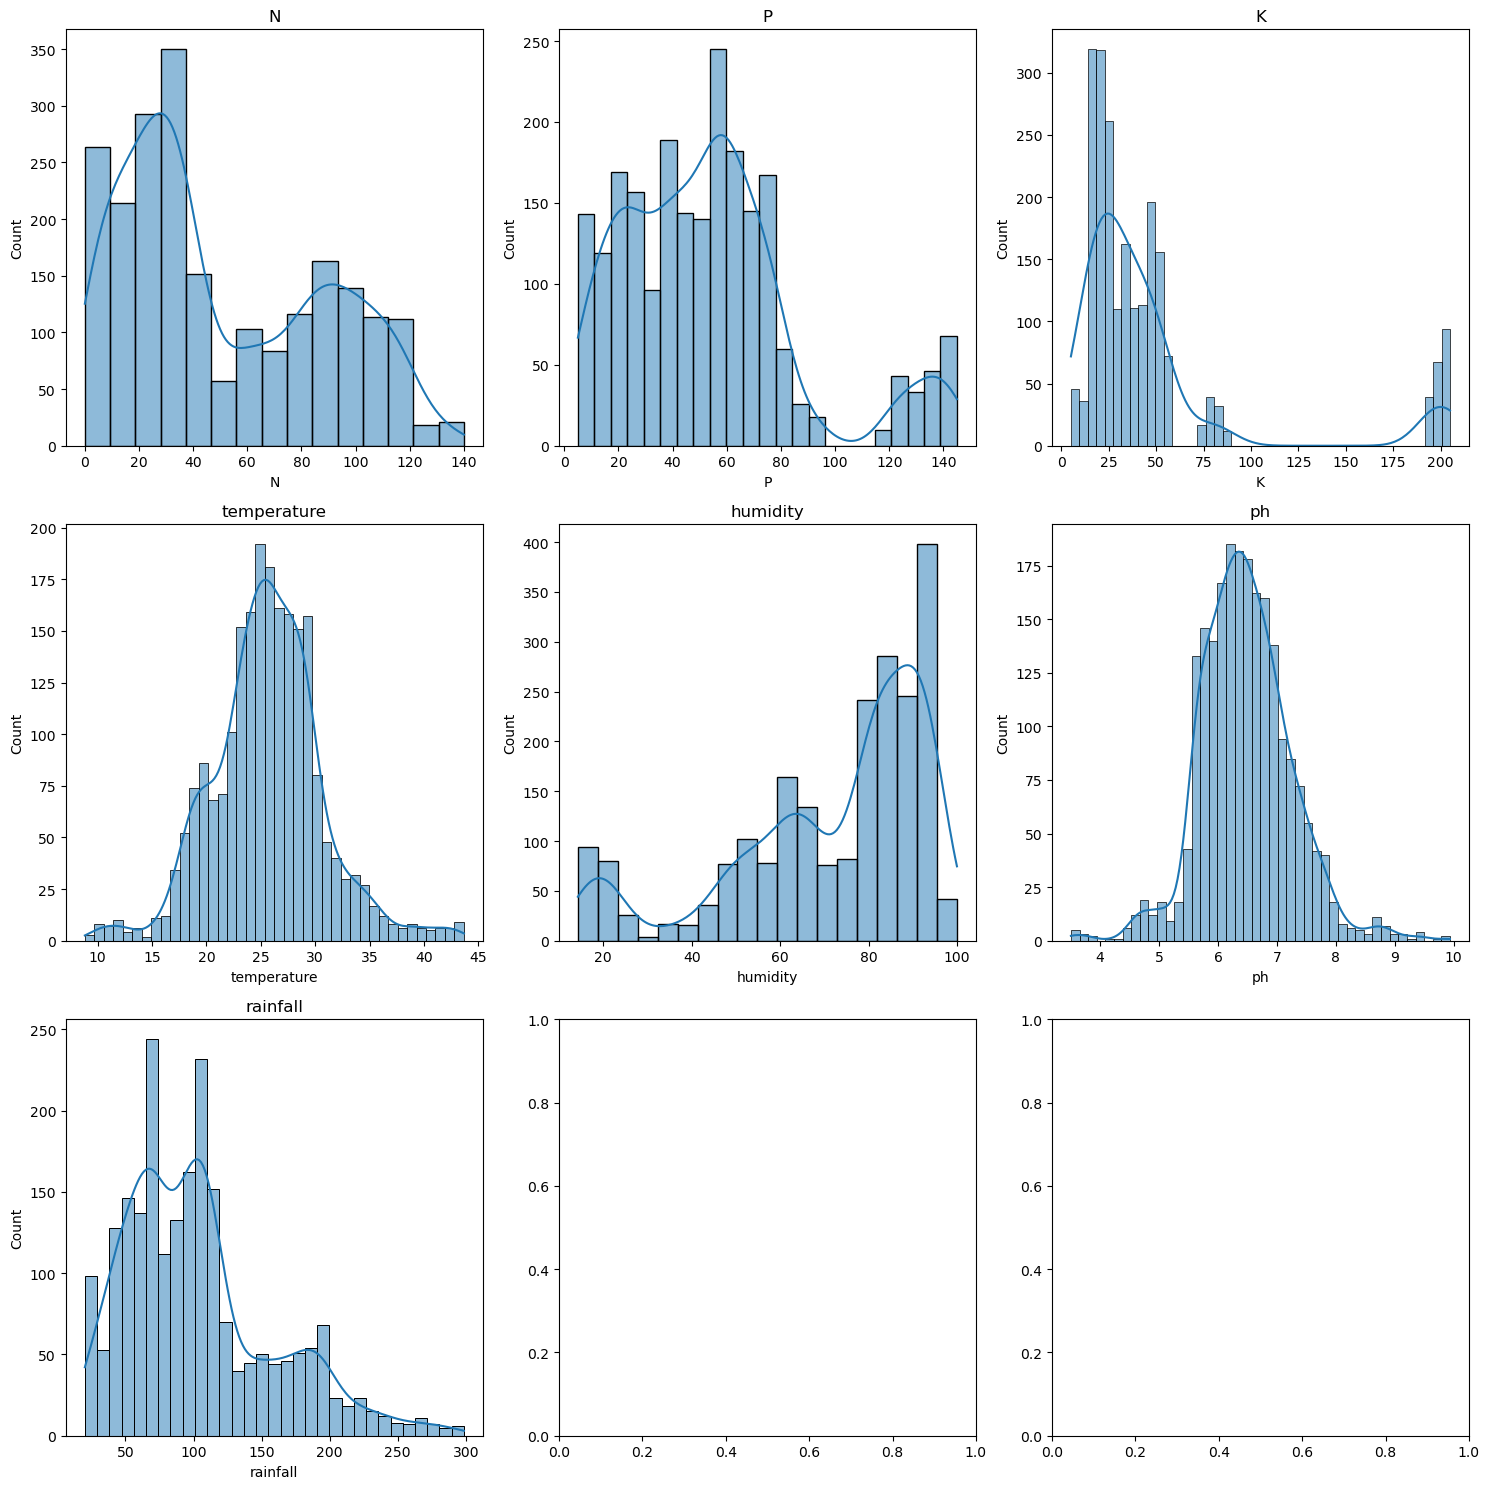

In [70]:
# visualise the distibution for each feature

fig , ax = plt.subplots(3,3,figsize=(15,15))
for i ,subplot in zip(features,ax.flatten()):
    sns.histplot(df[i],ax=subplot,kde=True)
    subplot.set_title(i)
plt.tight_layout()    
plt.show()

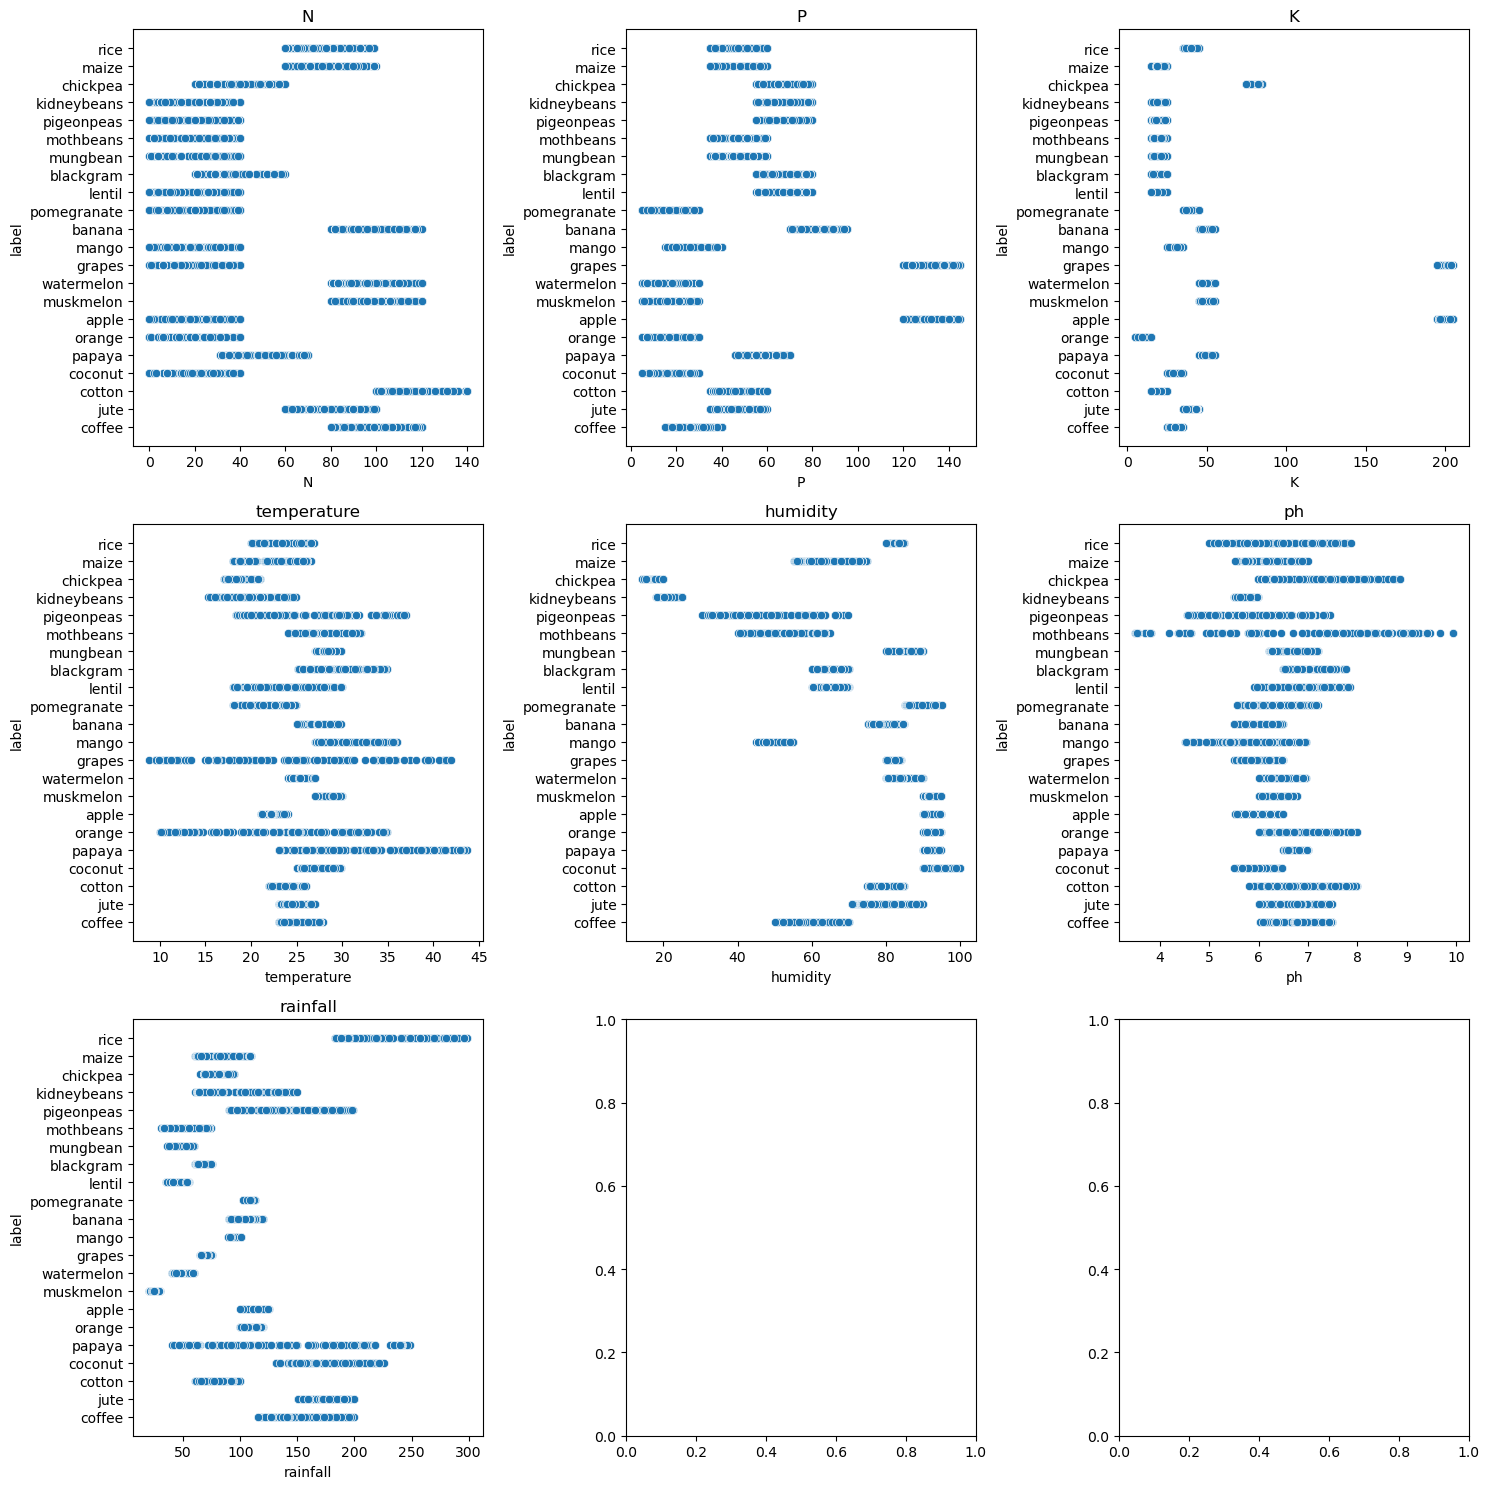

In [71]:
# plot scatter plot for each feature vs label

fig , ax = plt.subplots(3,3,figsize=(15,15))
for i ,subplot in zip(features,ax.flatten()):
    sns.scatterplot(x=df[i],y=df['label'],ax=subplot)
    subplot.set_title(i)
plt.tight_layout()    
plt.show()

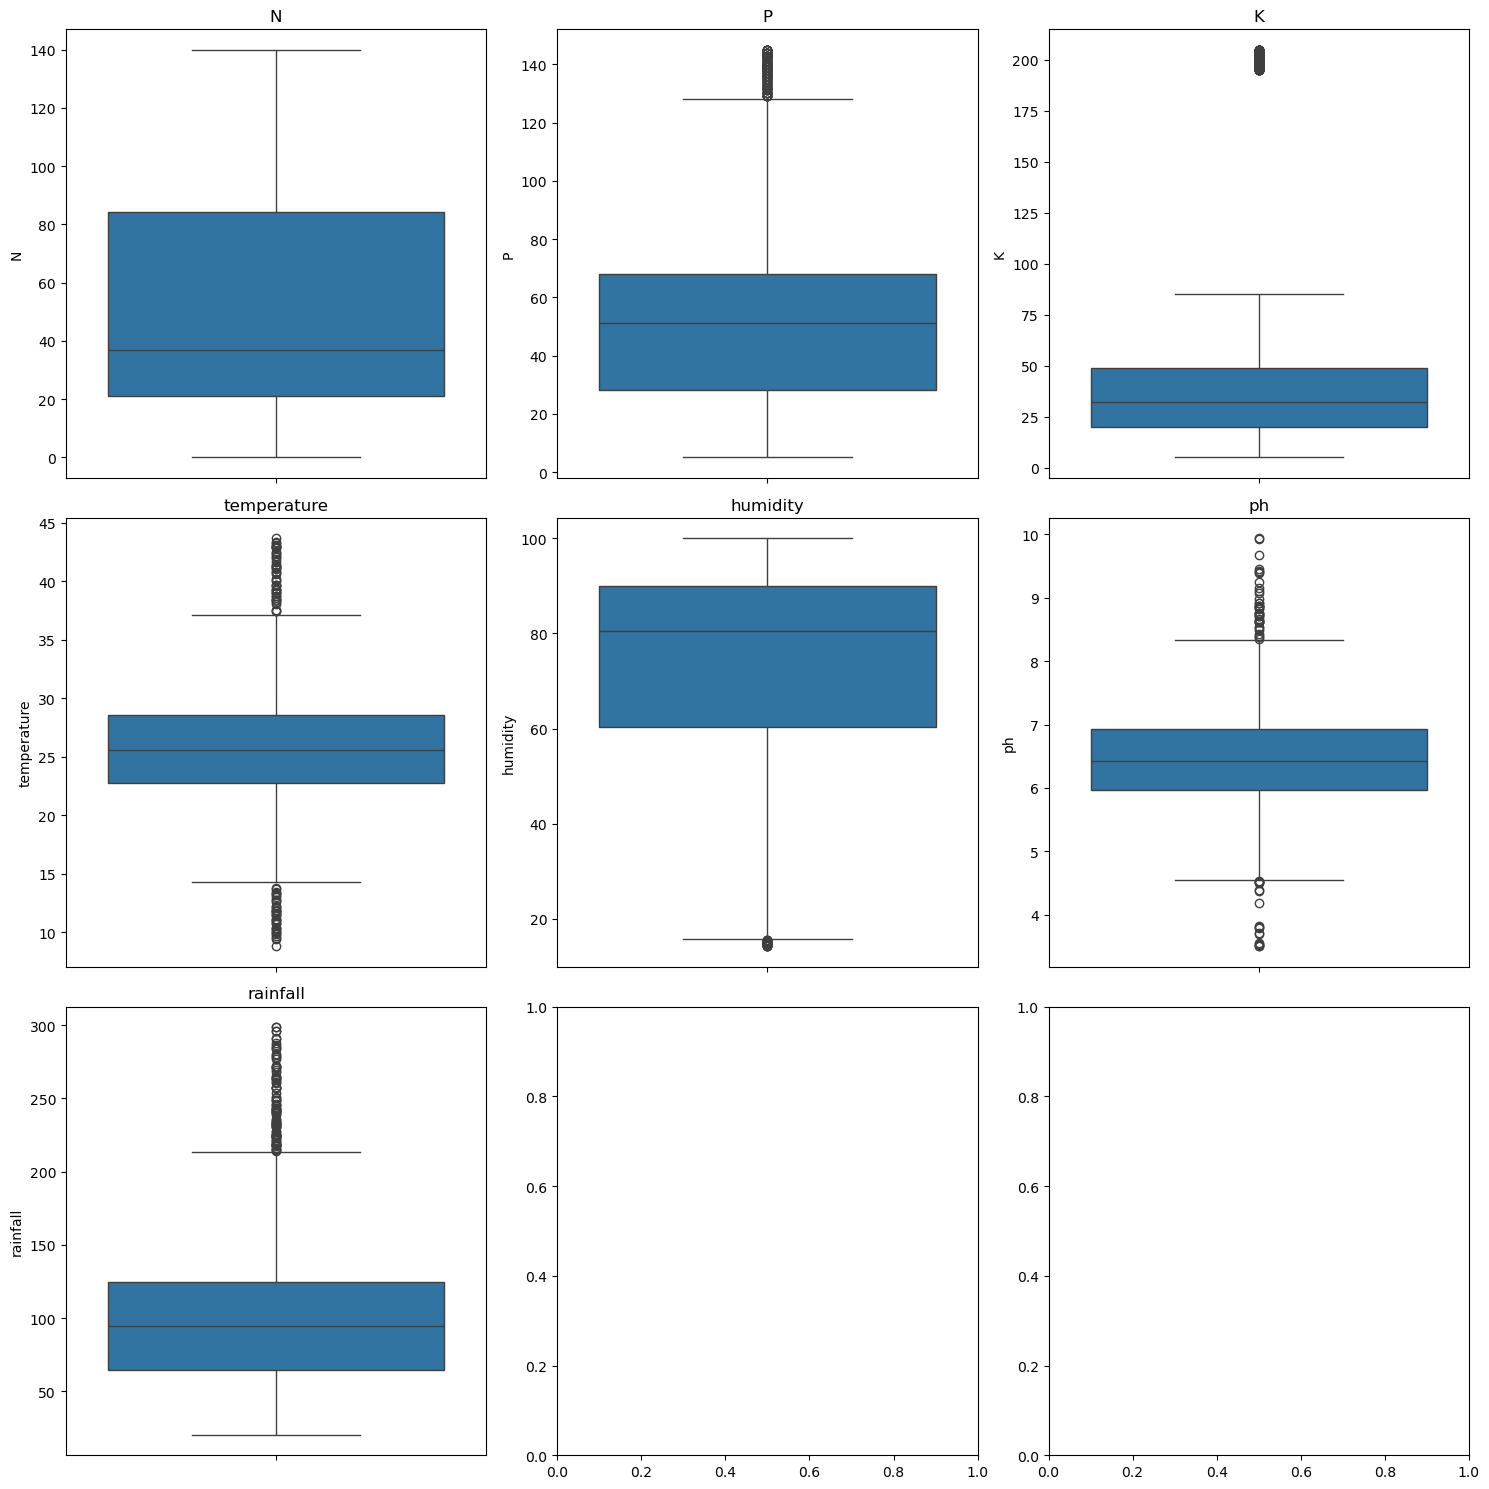

In [72]:
# create box plot for each feature to check outliers

fig , ax = plt.subplots(3,3,figsize=(15,15))
for i ,subplot in zip(features,ax.flatten()):
    sns.boxplot(df[i],ax=subplot)
    subplot.set_title(i)
plt.tight_layout()    
plt.show()

In [73]:
# check the correlation between features

numeric_columns = df.select_dtypes(include=np.number)
corr = numeric_columns.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


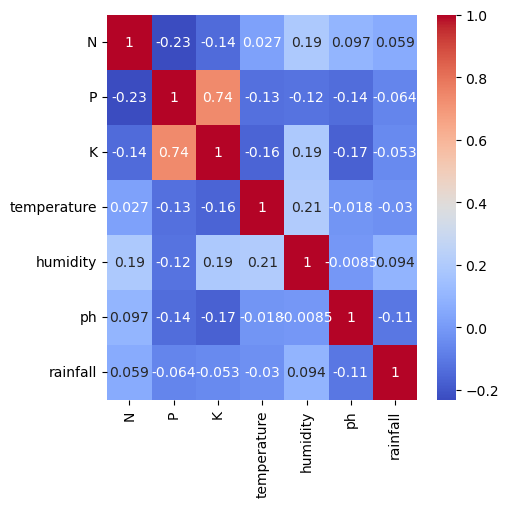

In [74]:
# visualise correlation matrix 

plt.figure(figsize=(5,5))
sns.heatmap(corr,annot=True,cbar = True , cmap='coolwarm')
plt.show()

In [75]:
crop_dict = { 
    "rice" : 0,
    "maize" : 1,
    "jute" : 3 ,
    "cotton" : 4,
    "coconut" : 5,
    "papaya" :6,
    "orange" : 7,
    "apple" :8,
    "muskmelon" : 9,
    "watermelon" : 10,
    "grapes" : 11,
    "mango" : 12,
    "banana" : 13,
    "pomegranate" : 14  , 
    "lentil" : 15 , 
    "blackgram" : 16,
    "mungbean" : 17,
    "mothbeans" : 18,
    "pigeonpeas" : 19,
    "kidneybeans" : 20,
    "chickpea" : 21,
    "coffee" : 22
   

}

In [76]:
df['crop_no'] = df['label'].map(crop_dict)
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_no
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,0


In [77]:
df.crop_no.value_counts()

crop_no
0     100
1     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
13    100
14    100
15    100
16    100
17    100
18    100
19    100
20    100
21    100
22    100
Name: count, dtype: int64

In [78]:
df.drop( 'label', axis =1 ,inplace = True)
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,crop_no
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,22
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,22


**TRAIN TEST SPLIT**

In [79]:
x = df.drop('crop_no',axis=1)
y = df['crop_no']

print(f"the shape of x is {x.shape}")
print(f"the shape of y is {y.shape}")

the shape of x is (2200, 7)
the shape of y is (2200,)


In [80]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(f"the shape of x_train is {x_train.shape}")
print(f"the shape of x_test is {x_test.shape}")
print(f"the shape of y_train is {y_train.shape}")
print(f"the shape of y_test is {y_test.shape}")

the shape of x_train is (1760, 7)
the shape of x_test is (440, 7)
the shape of y_train is (1760,)
the shape of y_test is (440,)
